<H1 style ='color :b;background-color:AliceBlue;border-style: dotted'> <ul>
    <li>(Ford GoBike System Data Exploration)
     <li style='color: purple'>  by (Mohamad Ahmad Hassan)
         <br>the Ford GoBike System data happened in February 2019
  <br>The Data Each trip is anonymized




In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<H2 style ='color :b;background-color:AliceBlue;border-style: ridge;
  border-color: coral;'> Preliminary Wrangling

<h4 style='color:maroon'>Just note that i have changed the name of the csv file to fordgobike.csv short one to easly use it

In [3]:
#loading the dataframe and show its head to know more about our data
df = pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<H2 style ='color :crimson;background-color:AliceBlue;border-style: groove'> <ul> <li> Data Assessing stage

In [4]:
df.shape

(183412, 16)

## Data Stratcure and types

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df['bike_id'].nunique()

4646

In [7]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

## number of Null values in the columns


In [9]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Checking if there is Duplicated values 

In [10]:
df.duplicated().sum()

0

<H3 style ='color :b;background-color:AliceBlue;border-style: groove'>
    <ul>
        <li style ='color :DarkMagenta'>After knowing the stracture of the dataset </li>
        <li style ='color :DarkMagenta'>am gonna list the main features of it </li>
        <li style ='color :DarkMagenta'>And various parts of intrest </li>
        <br>
        <ol>
            <li>The start time and end-time are both strings so might need to change it to datetime if we will exploreit
            <li>member birth year could be used to change it to ages of users
            <li>we have 4646 unique bikes id which is the total number of bikes we can use that further
            <li>we have 3 types of gender for users that we can explore more 
            <li>There is only two types of users
            <li>Duration column is in seconds we can change that to minutes or hours for better use
            <li>we could use the starting and ending stations to relate it attraction places in the future     
     
 


### i will just prepare some of the column for further analysis

<H2 style ='color :b;background-color:AliceBlue;border-style: ridge;
  border-color: coral;'> first i have changed the object to datetime 

In [11]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [12]:
df['end_time'] = pd.to_datetime(df['end_time'])

## i have added a start and end month of trips  columns for further usage

In [13]:
df['start_month'] = df.start_time.dt.strftime('%b')

In [14]:
df['end_month'] = df.end_time.dt.strftime('%b')

<H2 style ='color :b;background-color:AliceBlue;border-style: ridge;
  border-color: coral;'> i will change float to int in birth year coloumn to get ages of members

In [15]:
df['member_birth_year'] = df['member_birth_year'].astype('Int64')

## I have created new column for memmbers ages and filled the nan values with average age 

In [16]:
df['members_ages'] = 2021 - df['member_birth_year']


In [17]:
df['members_ages'] = df['members_ages'].fillna(int(df['members_ages'].mean()))

## I will add two new columns for duration of trip one for mintues and another for hours to have better look and understanding

In [18]:
df['duration_min']=df['duration_sec']/60
df['duration_hr']=df['duration_min']/60

In [19]:
df_final = df.copy()

## will drop the columns that i won't use to have better look and overview for the data

In [20]:
df_final.drop(['duration_sec','member_birth_year','start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [21]:
df_final.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month,end_month,members_ages,duration_min,duration_hr
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,Feb,Mar,37,869.750000,14.495833
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,No,Feb,Mar,36,708.683333,11.811389
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,Feb,Mar,49,1030.900000,17.181667
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,Feb,Mar,32,608.166667,10.136111
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,Feb,Mar,47,26.416667,0.440278


In [22]:
df_final['start_station_name'].value_counts().sum

<bound method Series.sum of Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64>

In [23]:
df_final['start_station_name'].value_counts().sum


<bound method Series.sum of Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64>

## Univariate Exploration



In [24]:
df_final['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

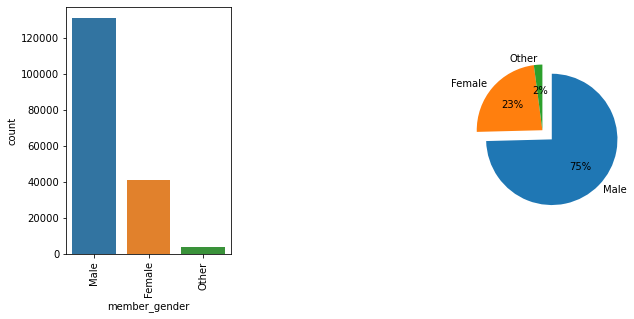

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1) 

sb.countplot(data=df_final,x=df_final['member_gender'],order = ['Male', 'Female','Other']);

# get the current tick locations and labels
plt.xticks(rotation=90);

plt.subplot(2, 3, 3) 
sorted_genders = df_final['member_gender'].value_counts()

plt.pie(sorted_genders, labels = sorted_genders.index, startangle = 90, explode=[0.2, 0, 0], counterclock = False, autopct='%1.0f%%');

plt.show;



<H3 style ='color :b;background-color:AliceBlue;border-style: ridge;
  border-color: coral;'> we have genders 
    <br> i used pie chart for better view and showing percent 
    <br> and it shows that majority of users are males with more than 120000 user

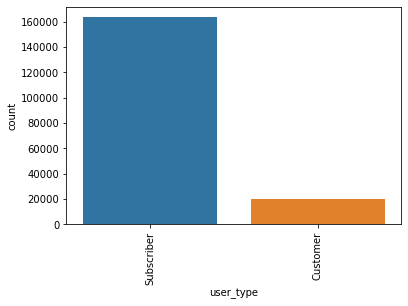

In [26]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.countplot(data=df,x='user_type', order=["Subscriber", "Customer"]);

# get the current tick locations and labels
plt.xticks(rotation=90); 


<H3 style ='color :b;background-color:AliceBlue;border-style: ridge;
  border-color: coral;'> in this plot we have that majority of users are subscribers not casual customers

In [27]:
df_final['members_ages'].describe()

count    183412.000000
mean         36.184841
std           9.886200
min          20.000000
25%          29.000000
50%          34.000000
75%          40.000000
max         143.000000
Name: members_ages, dtype: float64

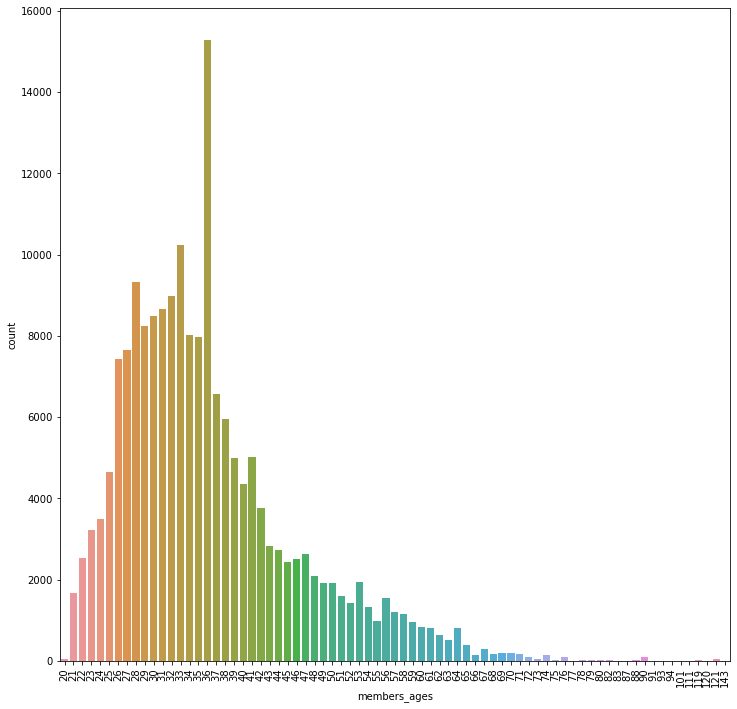

In [28]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize=(12, 12))
sb.countplot(data=df,x=('members_ages'));

# get the current tick locations and labels
plt.xticks(rotation=90); 


### it seems that 36 is riders most common age 

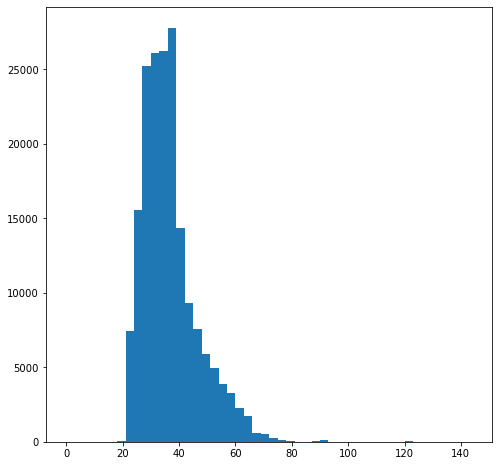

In [29]:
plt.figure(figsize=(8,8))
bins = np.arange(0, df_final['members_ages'].max()+3, 3)
plt.hist(data = df_final, x = 'members_ages', bins = bins);

<H3 style ='color :b;background-color:AliceBlue;border-style: ridge;
  border-color: coral;'> i used seaborn ploting to check ages of memebrs with bigger plot to have better look 
    <br> i was nice to know that young users start from age of 20
    <br> oldest memeber is 143 which is miracle or not updated data 
    <br> used plt to se that most number of member range from 30+ ro 40 which is logical 

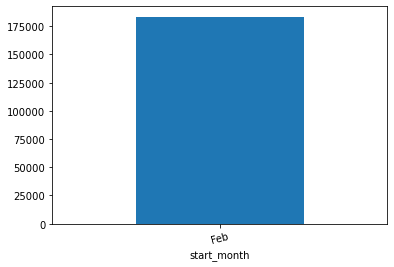

In [30]:
df_final.groupby(['start_month']) ['start_month'].count().plot(kind='bar');
plt.xticks(rotation=15);

In [31]:
df_final['start_month'].value_counts()

Feb    183412
Name: start_month, dtype: int64

In [32]:
df_final['end_month'].value_counts()

Feb    183396
Mar        16
Name: end_month, dtype: int64

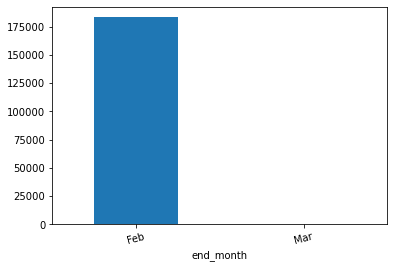

In [33]:
df_final.groupby(['end_month']) ['end_month'].count().plot(kind='bar');
plt.xticks(rotation=15);

<H3 style ='color :b;background-color:AliceBlue;border-style: ridge;
  border-color: coral;'> it was a surprise to find that the system of bike sharing used 
    <br> for one month and may be less than a month
    <br> all of the start dates show it used in febuarary
    <br>
    <br>this mean the data is not updated 

###  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  -_-  

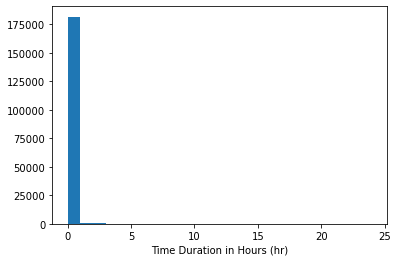

In [34]:
bins = np.arange(0, df_final['duration_hr'].max()+1, 1)
plt.hist(data = df_final, x = 'duration_hr', bins = bins)
plt.xlabel('Time Duration in Hours (hr)')
plt.show()

### the time duration has outliers and i change the scale to have a better look on the data

In [35]:
df_final.duration_hr.describe()

count    183412.000000
mean          0.201688
std           0.498442
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hr, dtype: float64

In [36]:
df_final.duration_min.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

#### honeslty i have searched how to adjust it i used the following Github repositries in this plot

#### https://github.com/rishusingh121/fordgobike/blob/master/exploration_template.ipynb, https://github.com/jemc36/Udacity-DAND-DataVisualization-Ford-GoBike/blob/master/exploration.ipynb

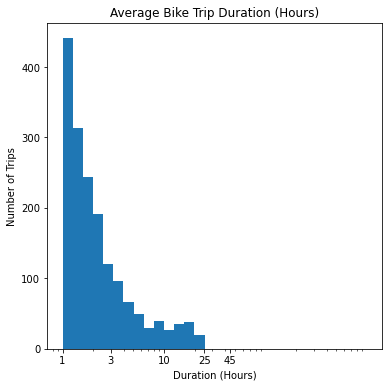

In [37]:
plt.figure(figsize=(6,6))
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 25 , 45]
labels = ['{}'.format(i) for i in ticks]
plt.hist(data = df_final , x = 'duration_hr' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Hours)');
plt.title('Average Bike Trip Duration (Hours)');
plt.ylabel('Number of Trips');

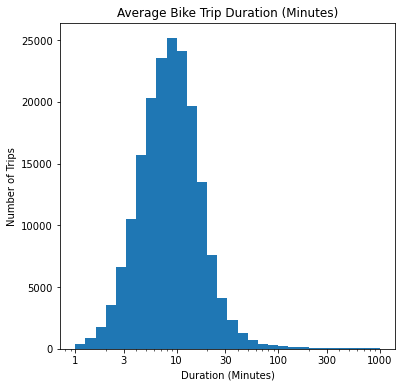

In [38]:
plt.figure(figsize=(6,6))
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(i) for i in ticks]
plt.hist(data = df_final , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

---------------------------------------------------------------------

#### top 10 starting stations

In [39]:
df_final['start_station_name'].value_counts().index[:10]

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Steuart St at Market St'],
      dtype='object')

#### Top 10 Ending stations

In [40]:
df_final['end_station_name'].value_counts().index[:10]

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St',
       'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St'],
      dtype='object')

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

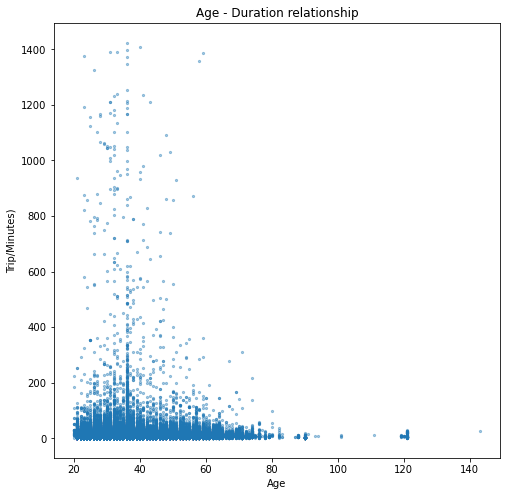

In [50]:
#Correltion between age of rider and duration of the trip
plt.figure(figsize = [8,8])
plt.scatter(data = df_final , x = 'members_ages' , y = 'duration_min' , alpha = 0.4, s=5 )
plt.title('Age - Duration relationship')
plt.xlabel('Age')
plt.ylabel('Trip/Minutes)');

### the scatter plot suggests that as age get older the duration of trip decrease which is very logical

----------

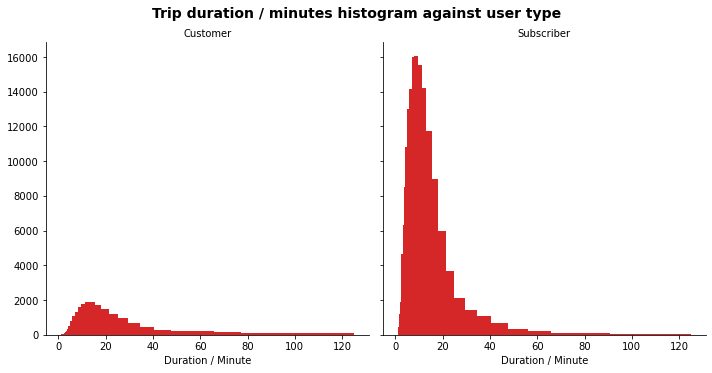

In [42]:
# Will use Facet technique to compare between User type and duration/minute 

facet = sb.FacetGrid(df_final, col="user_type", margin_titles=True, height=5)
bins = 5**np.arange(0 , 3 + 0.1 , 0.1);
facet.map(plt.hist, "duration_min", color=sb.color_palette()[3], bins=bins)
facet.set_axis_labels("Duration / Minute")
facet.set_titles(col_template = '{col_name}')
facet.fig.suptitle('Trip duration / minutes histogram against user type', y=1.03, fontsize=14, fontweight='semibold');



###  The Facet grid shows that the subscribers numbers are greater in number but it seems that both customers and subscribers spend same amount of time on rides 

--------------------

In [43]:
df_final.head(1)

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month,end_month,members_ages,duration_min,duration_hr
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,Feb,Mar,37,869.75,14.495833


In [44]:
df_final.query("members_ages == '143'")

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month,end_month,members_ages,duration_min,duration_hr
27370,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,San Francisco Ferry Building (Harry Bridges Pl...,24th St at Bartlett St,6436,Customer,Female,No,Feb,Feb,143,24.566667,0.409444


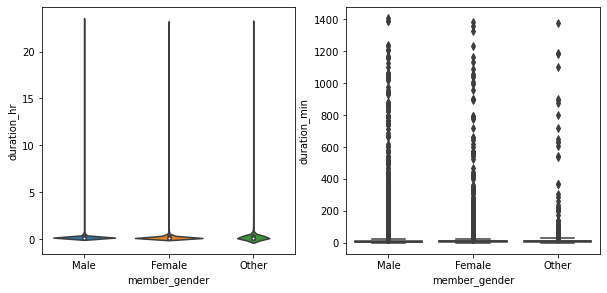

In [45]:
# Types of Gender
plt.figure(figsize=(10, 10))
plt.subplot(221)
gender = ['Male', 'Female', 'Other']

# Returns the types for members Genders with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
genderclass = pd.api.types.CategoricalDtype(ordered=True, categories=gender)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df_final['member_gender'] = df_final['member_gender'].astype(genderclass);

sb.violinplot(data=df_final, x='member_gender', y='duration_hr');

plt.subplot(222)

gender = ['Male', 'Female', 'Other']

# Returns the types for members Genders with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
genderclass = pd.api.types.CategoricalDtype(ordered=True, categories=gender)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df_final['member_gender'] = df_final['member_gender'].astype(genderclass);

sb.boxplot(data=df_final, x='member_gender', y='duration_min');

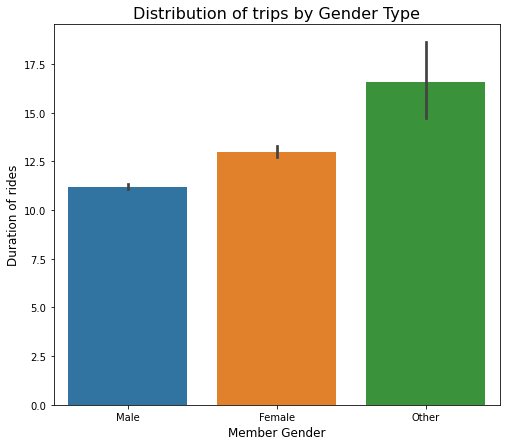

In [46]:
plt.figure(figsize=(8,7))
base_color = sb.color_palette()[3]
gender = ['Male', 'Female', 'Other']

genderclass = pd.api.types.CategoricalDtype(ordered=True, categories=gender)
df_final['member_gender'] = df_final['member_gender'].astype(genderclass);

sb.barplot(data=df_final, x='member_gender', y='duration_min');

plt.xlabel('Member Gender', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by Gender Type", fontsize=16);

### it seems the other genders has higher ride duration
### and despite the number of male riders but the female riders has longer rides duration it a slight differnce but still 


------------

###  Using clustered barplot between  gender type and user type

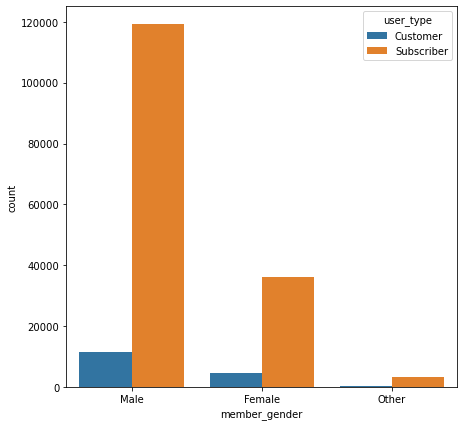

In [47]:
plt.figure(figsize = (7,7))
sb.countplot(data = df_final, x = 'member_gender', hue = 'user_type');

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

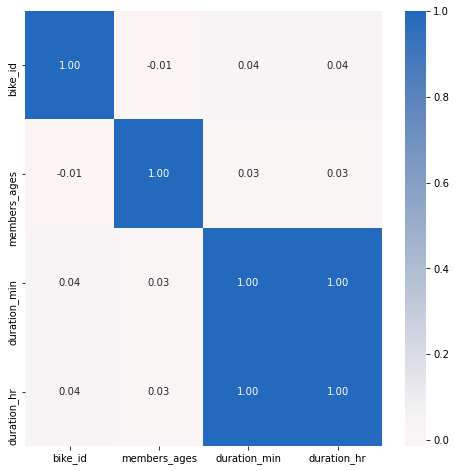

In [48]:
plt.figure(figsize=(8,8));
sb.heatmap(df_final.corr(method='spearman'), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

#### used heatmap grid between all numeric variables but it didn't add anything 

________________________________


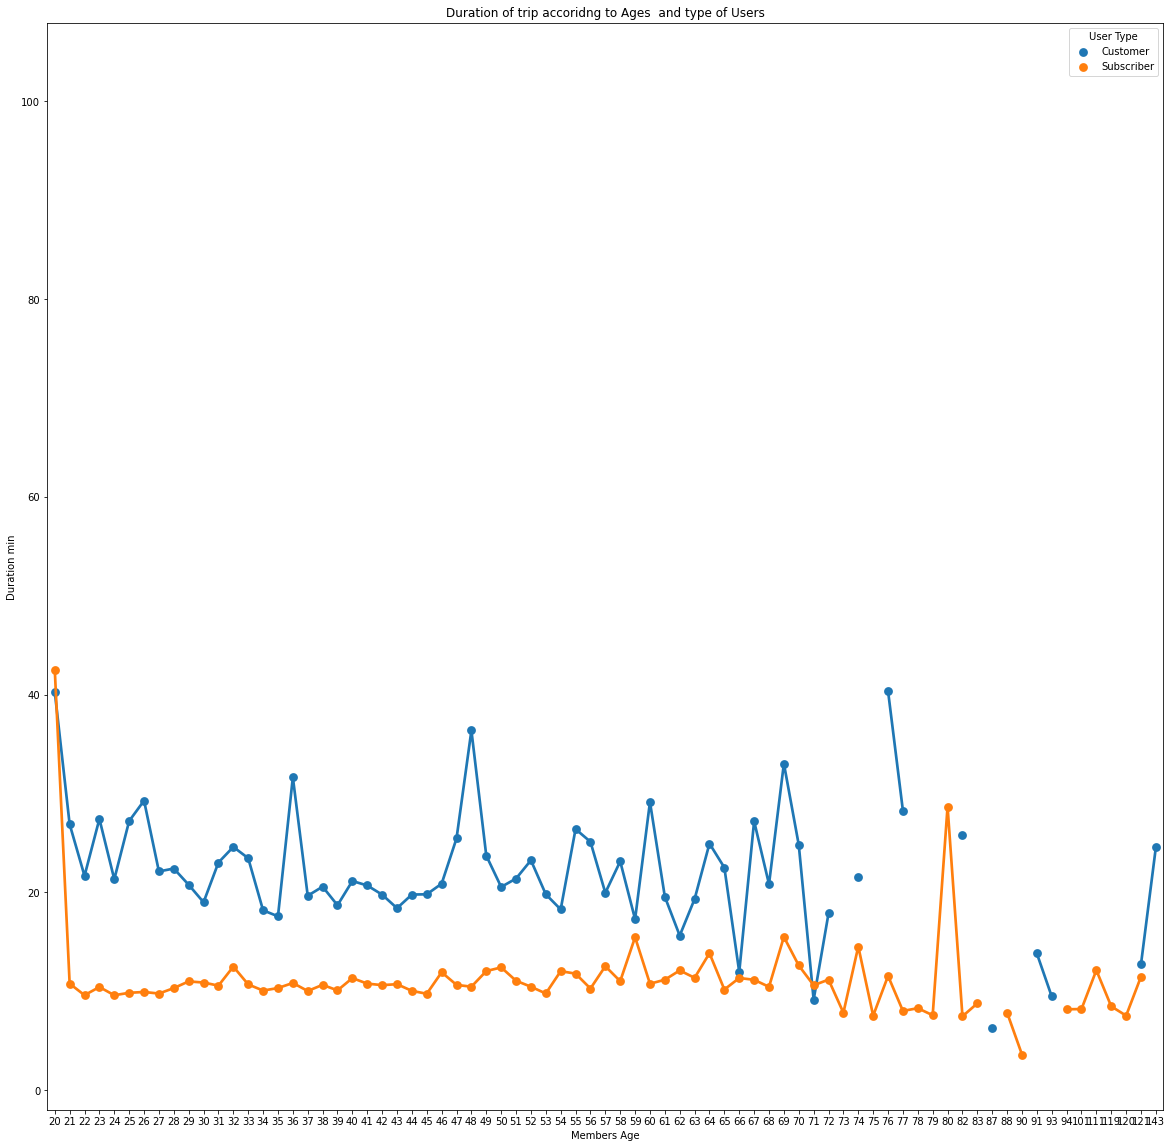

In [49]:
plt.figure(figsize=[20, 20])
#20-43
young_age = df_final.query(" members_ages == '43' ")
# plot the point plot of month vs user type
sb.pointplot(data=df_final, x='members_ages', y='duration_min', hue='user_type', errwidth=0)
#xticks = [20, 25, 30 , 35, 40 , 45, 50 ,55, 60 ,70, 75 , 80, 90 ,100 , 105]
plt.xlabel('Members Age')
plt.ylabel('Duration min')
plt.title('Duration of trip accoridng to Ages  and type of Users')
plt.legend(title='User Type');



<H3 style ='color :b;background-color:AliceBlue;border-style: groove'>
    <ul>
        <li style ='color :DarkMagenta'>To sum things up and wrap it  </li>
        <br>
        <ol>
            <li>some data has outliers these outlier may be mis-input or non updated data errors
            <li>in the last plot it sums that duration of rides is high for younger ages
            <li>subscribers use rides more having higher duration
              
     
 


<H3 style ='color :b;background-color:AliceBlue;border-style: groove'>
    <ul>
        <li style ='color :DarkMagenta'>what is surprising  </li>
        <br>
        <ol>
            <li>from the univariate part that despite males are the dominant number of users
            <li>females has higher duration ride we can use that to promote the service to more female users
            
              
     
 


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!